In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [8]:
import math
sigma = math.sqrt(225)  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения при уровне доверия  𝛽  = 0.95. 
Delta = 3 #%         #Погрешность

In [9]:
N = int(((sigma*Z)/Delta)**2)
N

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [17]:
n = 25
m = 130
sigma = 15
Z = 2.326

In [18]:
Delta = (sigma / math.sqrt(n)) * Z
Delta

6.978

In [19]:
print(m-Delta, m, m+Delta)

123.022 130 136.978


In [23]:
L = round((m+Delta) - (m-Delta))
L

14

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [36]:
population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

In [37]:
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 34.07721396834484
p = 1.6549046109999143e-254


Так как p-value (1.84) больше нашего фиксированного уровня значимости α=0,001, на котором мы проверяем гипотезу, то оснований отвергать нулевую гипотезу нет. Таким образом, это доказывает, что различие статистически не значимо.

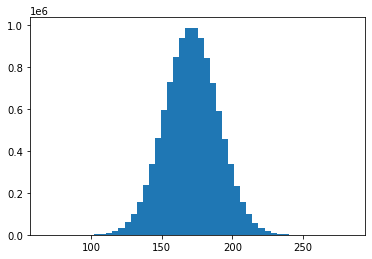

In [46]:
plt.hist(population_men, bins=50);
plt.hist(population_women, bins=50);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [47]:
sigma = 150  
Z = 1.96  #  %   # Квантиль нормального распределения при уровне доверия  𝛽  = 0.95. 
Delta = 50         #Погрешность

In [48]:
N = int(((sigma*Z)/Delta)**2)
N

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [11]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [52]:
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

Наш р > 0.05, это значит что аргументов недостаточно, чтобы отвергнуть нулевую гипотезу.
То есть можно предположить, что маг не умеет предсказывать погоду, так как у точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта.

Данное заключение не означает, что нулевая гипотеза истинна, возможно просто недостаточно аргументов (маленький объём выборки), чтобы её отвергнуть.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [12]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [54]:
def mean_confidence_interval(data, confidence=0.90): 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [56]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [58]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [59]:
stats.ttest_ind(data_1, data_2, equal_var=False)

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

Значение pvalue= 2.5 говорит о том, что существует вероятность 2.5%, что данные выборки принадлежат одному множеству. Это меньше, чем уровень достоверности 5%.

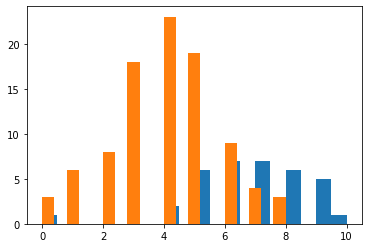

In [64]:
plt.hist(data_1, bins=20);
plt.hist(data_2, bins=20);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Все зависит от уровня значимости α, на котором мы проверяем гипотезу.
Если p-value меньше нашего фиксированного
уровня значимости α, то нулевую гипотезу следует отвергнуть, если больше —
оснований отвергать нулевую гипотезу нет.

Так как p-value = 0.03, что меньше традиционного уровня значимости 0,05, то мы отвергаем нулевую гипотезу о том, что датасет имеет нормальное распределение.


<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [65]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

In [66]:
AB = np.concatenate((A, B))
AB.mean()

170.1379867211236

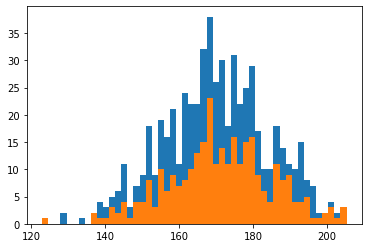

In [73]:
plt.hist(AB, bins=50);
plt.hist(B, bins=50);

In [74]:
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

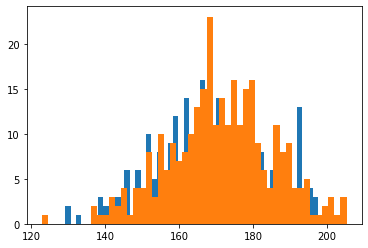

In [75]:
plt.hist(A, bins=50);
plt.hist(B, bins=50);

Мы видим, что выборки отличаются незначительно, так как pvalue=0.05. При уровне значимости 5% нет значимого различия эффективности препаратов А и B.

Чем меньше p уровень значимости, тем сильнее получаемые различия. То есть если бы р-value был < 0.05, то можно было бы говорить о том, что выборки отличаются и эффект не случайный.